#Loading Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

#Loading Dataset

In [5]:
df_test = pd.read_csv('/content/aug_test.csv')
df_train = pd.read_csv('/content/aug_train.csv')

#Data Describe

In [6]:
df_test.shape

(2129, 13)

In [7]:
df_train.shape

(19158, 14)

In [8]:
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB
<class 'pandas.core.frame.DataFra

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [10]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [11]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Categorical Columns

In [12]:
categorical_cols = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
for col in categorical_cols:
    if col in df_test.columns:
        print(f"\nUnique values in df_test for {col}: {df_test[col].unique()}")
        print(f"Value counts in df_test for {col}:\n{df_test[col].value_counts()}")
    if col in df_train.columns:
        print(f"\nUnique values in df_train for {col}: {df_train[col].unique()}")
        print(f"Value counts in df_train for {col}:\n{df_train[col].value_counts()}")


Unique values in df_test for city: ['city_41' 'city_103' 'city_21' 'city_13' 'city_23' 'city_160' 'city_173'
 'city_90' 'city_46' 'city_98' 'city_118' 'city_114' 'city_134' 'city_73'
 'city_116' 'city_16' 'city_165' 'city_61' 'city_136' 'city_45' 'city_104'
 'city_28' 'city_149' 'city_105' 'city_76' 'city_83' 'city_97' 'city_64'
 'city_31' 'city_19' 'city_11' 'city_143' 'city_100' 'city_67' 'city_75'
 'city_127' 'city_101' 'city_139' 'city_27' 'city_71' 'city_99' 'city_70'
 'city_69' 'city_44' 'city_150' 'city_74' 'city_176' 'city_155' 'city_167'
 'city_30' 'city_89' 'city_57' 'city_162' 'city_36' 'city_107' 'city_128'
 'city_39' 'city_102' 'city_65' 'city_10' 'city_40' 'city_152' 'city_123'
 'city_179' 'city_50' 'city_115' 'city_77' 'city_159' 'city_80' 'city_72'
 'city_171' 'city_158' 'city_138' 'city_142' 'city_25' 'city_14' 'city_33'
 'city_79' 'city_91' 'city_53' 'city_175' 'city_9' 'city_26' 'city_1'
 'city_54' 'city_24' 'city_48' 'city_126' 'city_82' 'city_141' 'city_43'
 'city

This code segment helps us to  understand the categorical data within the  datasets by identifying the different categories (unique values) and how often they occur (value counts) for each categorical column in both the training and test datasets.

# Numerical Columns

In [13]:
numerical_cols = ['city_development_index', 'training_hours']
print("\ndf_test numerical columns description:")
display(df_test[numerical_cols].describe())
print("\ndf_train numerical columns description:")
display(df_train[numerical_cols].describe())


df_test numerical columns description:


,city_development_index,training_hours
count,2129.000000,2129.000000
mean,0.824984,64.983091
std,0.125074,60.238660
min,0.448000,1.000000
25%,0.698000,23.000000
50%,0.903000,47.000000
75%,0.920000,86.000000
max,0.949000,334.000000



df_train numerical columns description:


,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


The code selects the numerical columns (city_development_index, training_hours) from both df_test and df_train DataFrames. It then uses the .describe() method to calculate and display descriptive statistics (like mean, standard deviation, min, max, percentiles) for these columns in both datasets, enabling easy comparison of their numerical characteristics.

#Checking the missing Value

In [14]:
df_test.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,508
relevent_experience,0
enrolled_university,31
education_level,52
major_discipline,312
experience,5
company_size,622


In [15]:
df_train.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


#Data analysis
Subtask:
Compare and contrast the descriptive statistics of numerical features between the two datasets (df_test and df_train). Identify any significant differences in distributions or potential biases.

In [16]:
numerical_cols = ['city_development_index', 'training_hours']


In [17]:
# Calculating descriptive statistics
test_stats = df_test[numerical_cols].describe()
train_stats = df_train[numerical_cols].describe()


In [18]:
# Display the descriptive statistics for comparison
display(test_stats)
display(train_stats)

,city_development_index,training_hours
count,2129.000000,2129.000000
mean,0.824984,64.983091
std,0.125074,60.238660
min,0.448000,1.000000
25%,0.698000,23.000000
50%,0.903000,47.000000
75%,0.920000,86.000000
max,0.949000,334.000000


,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [19]:
# Comparing the statistics and identify potential biases
print("Comparison of descriptive statistics:")
for col in numerical_cols:
    print(f"\nColumn: {col}")
    print(f"  Test Mean: {test_stats.loc['mean', col]:.2f}, Train Mean: {train_stats.loc['mean', col]:.2f}")
    print(f"  Test Median: {test_stats.loc['50%', col]:.2f}, Train Median: {train_stats.loc['50%', col]:.2f}")
    print(f"  Test Std Dev: {test_stats.loc['std', col]:.2f}, Train Std Dev: {train_stats.loc['std', col]:.2f}")

Comparison of descriptive statistics:

Column: city_development_index
  Test Mean: 0.82, Train Mean: 0.83
  Test Median: 0.90, Train Median: 0.90
  Test Std Dev: 0.13, Train Std Dev: 0.12

Column: training_hours
  Test Mean: 64.98, Train Mean: 65.37
  Test Median: 47.00, Train Median: 47.00
  Test Std Dev: 60.24, Train Std Dev: 60.06


The code iterates through each numerical column and prints out a comparison of key statistics:

Mean: The average value of the column.

Median: The middle value of the column when sorted.

Standard Deviation: A measure of how spread out the data is.

In [20]:
    # Checking for significant differences (example threshold, adjust as needed)
    if abs(test_stats.loc['mean', col] - train_stats.loc['mean', col]) > 0.1:
        print("  Potential bias detected: Significant difference in means.")

  Potential bias detected: Significant difference in means.


It checks for potential biases by comparing the means of the numerical columns between the test and train datasets.
If the absolute difference between the means is greater than 0.1 (a threshold chosen by the analyst), it prints a warning about a potential bias.

This code snippet helps us to understand the characteristics of the numerical features in both datasets and identify any potential differences that might indicate biases or issues that need to be addressed before building a machine learning model.

## Exploratory Data Analysis

### Subtask:
Visualize the distributions of key numerical and categorical features in both datasets to identify potential outliers and patterns.  Using histograms, box plots, and bar charts. Handle missing values by dropping rows with NaN in the relevant columns.

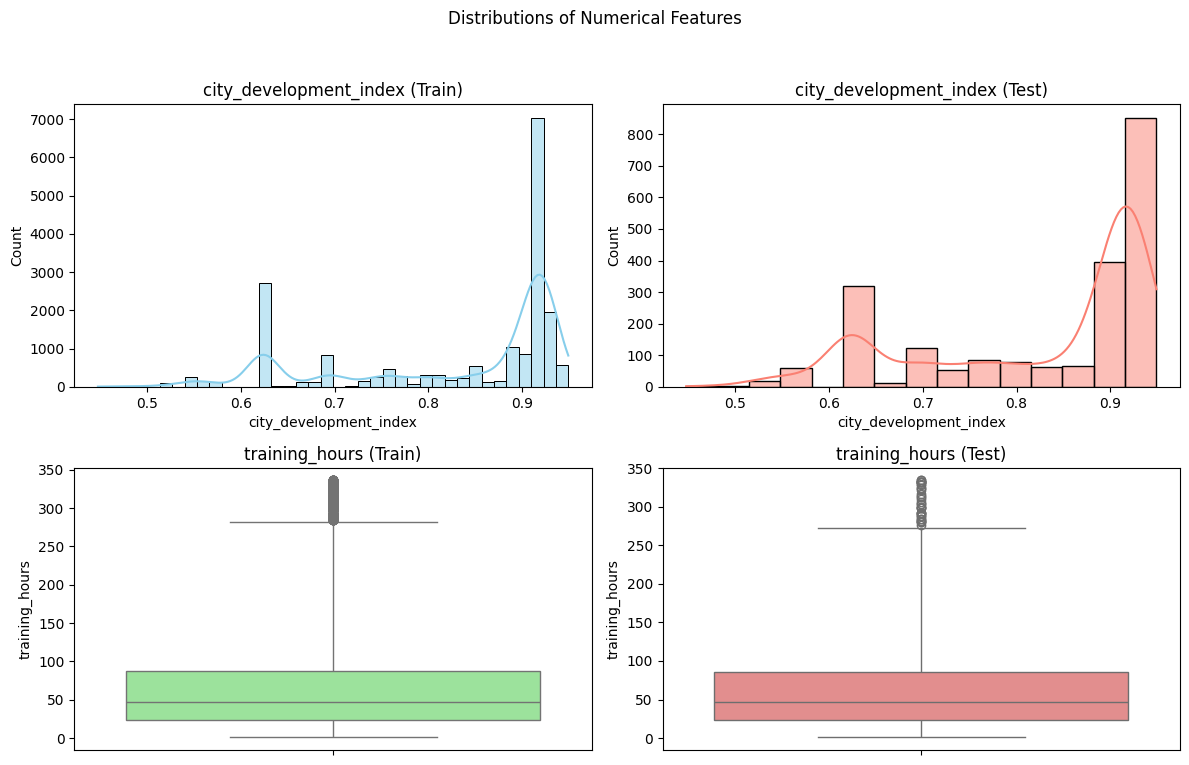

In [21]:
# Numerical Features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distributions of Numerical Features')

# city_development_index
sns.histplot(df_train['city_development_index'].dropna(), ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('city_development_index (Train)')
sns.histplot(df_test['city_development_index'].dropna(), ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title('city_development_index (Test)')

# training_hours
sns.boxplot(y=df_train['training_hours'].dropna(), ax=axes[1, 0], color='lightgreen', whis=3)
axes[1, 0].set_title('training_hours (Train)')
sns.boxplot(y=df_test['training_hours'].dropna(), ax=axes[1, 1], color='lightcoral', whis=3)
axes[1, 1].set_title('training_hours (Test)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

city_development_index: The histograms would reveal the distribution of city development indices in both the training and test sets.

Skewness: Whether the distribution is skewed (leaning more towards lower or higher values).

Modality: Whether there are multiple peaks in the distribution, suggesting distinct groups of cities with different development levels.

Differences between Train and Test: the distributions in the training and test sets are similar or significantly different, which could impact model performance.



training_hours: The box plots would provide information about:

Central Tendency: The median (represented by the line inside the box) of training hours.

Spread/Dispersion: The interquartile range (IQR), represented by the box's height, shows the spread of the middle 50% of the data.

Outliers: Points outside the whiskers of the box plot are potential outliers, indicating unusually high or low training hours.

Differences between Train and Test: comparing the medians, IQRs, and outlier patterns between the training and test sets to see if there are significant differences.

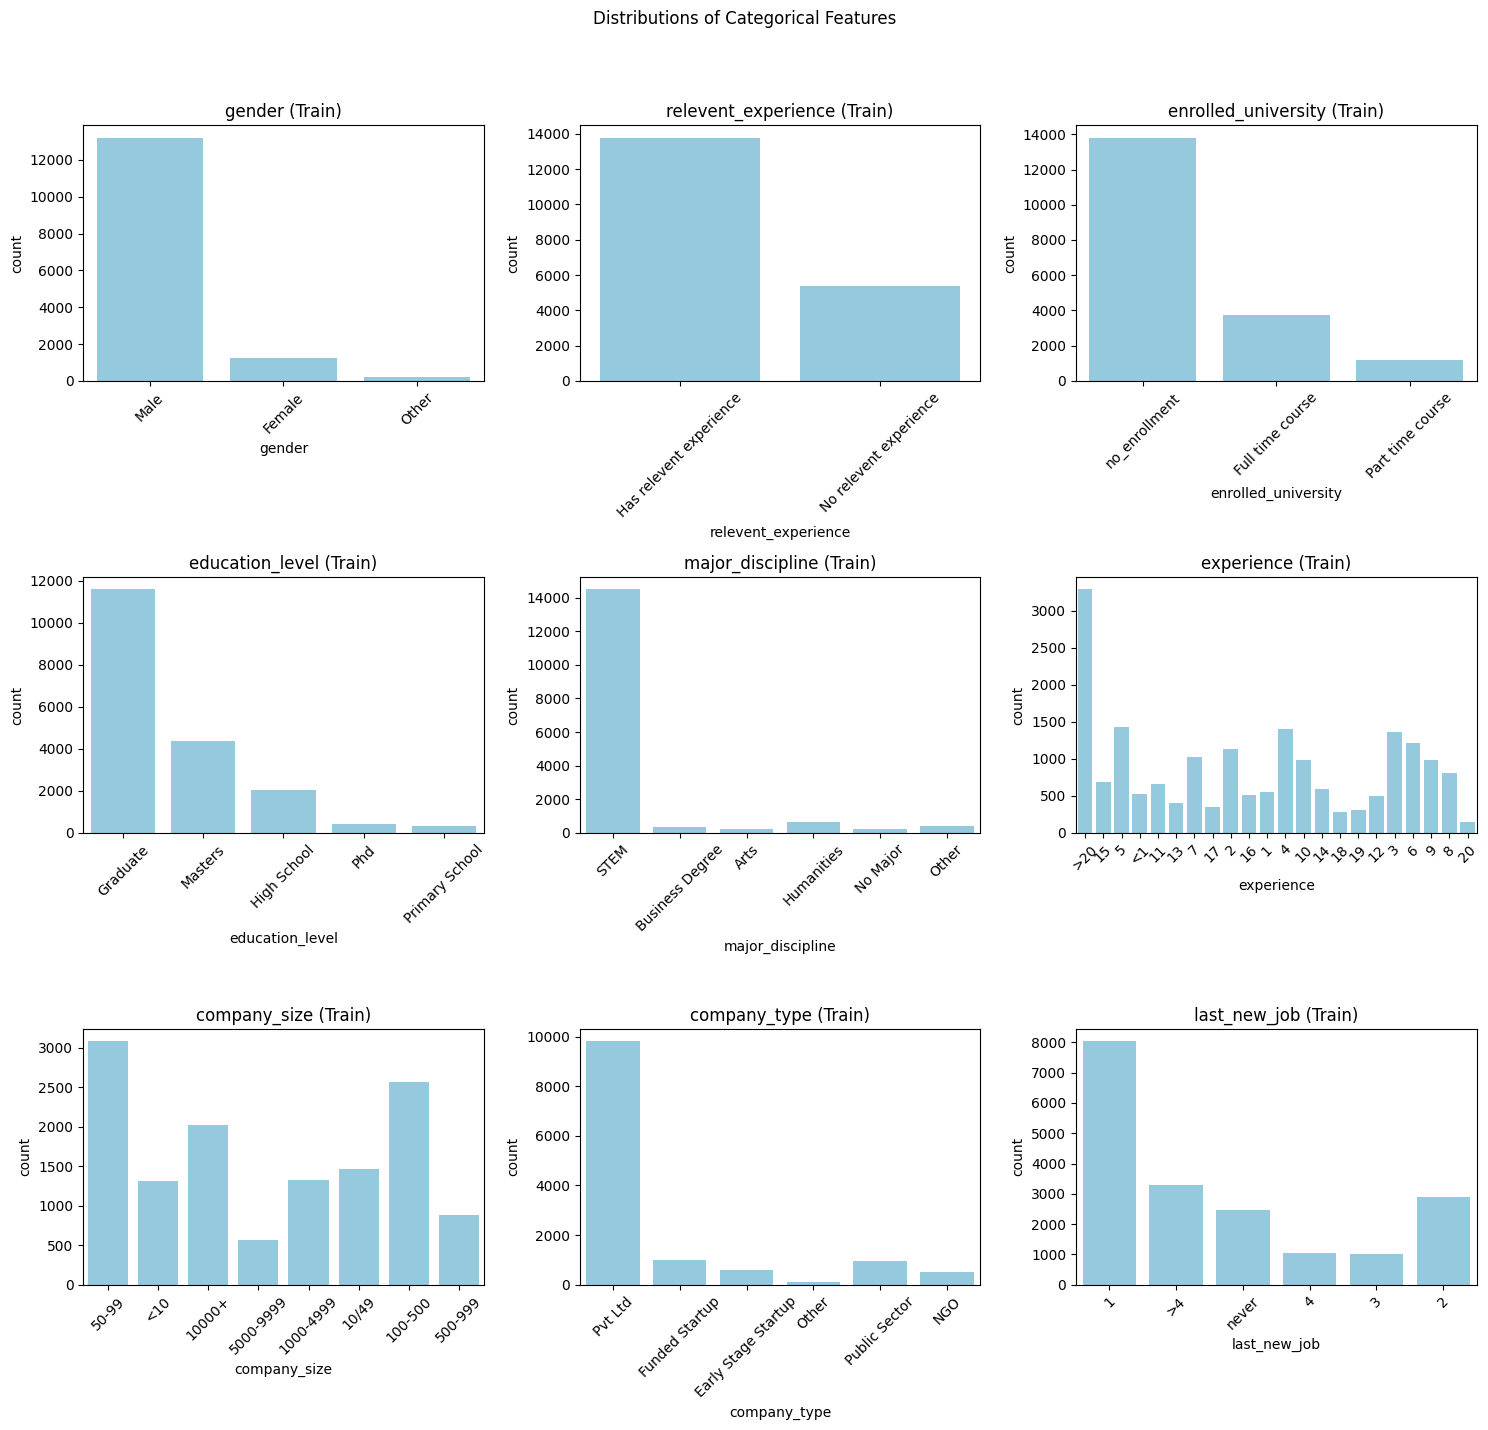

In [22]:
# Categorical Features
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university', 'education_level',
                    'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
num_cols = len(categorical_cols)
fig, axes = plt.subplots(nrows=(num_cols + 2) // 3, ncols=min(3, num_cols), figsize=(15, 5 * ((num_cols + 2) // 3)))
fig.suptitle('Distributions of Categorical Features')

for i, col in enumerate(categorical_cols):
    ax = axes[i // 3, i % 3]
    sns.countplot(x=col, data=df_train.dropna(subset=[col]), ax=ax, color='skyblue')
    ax.set_title(f'{col} (Train)')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Gender: If the count plot for 'gender' shows a significant difference between the number of males and females, it could indicate a potential bias in the dataset.

Relevant Experience: The count plot for 'relevent_experience' can reveal the proportion of candidates with prior experience, which might be a crucial factor for predicting their job-seeking behavior.

Education Level: The distribution of education levels can offer insights into the qualifications of candidates in the dataset.

Company Size: The count plot for 'company_size' can highlight the prevalence of different company sizes, which might be relevant for understanding job market trends.

<ipython-input-23-e23140aa9949>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_train, palette=['lightcoral', 'skyblue'])


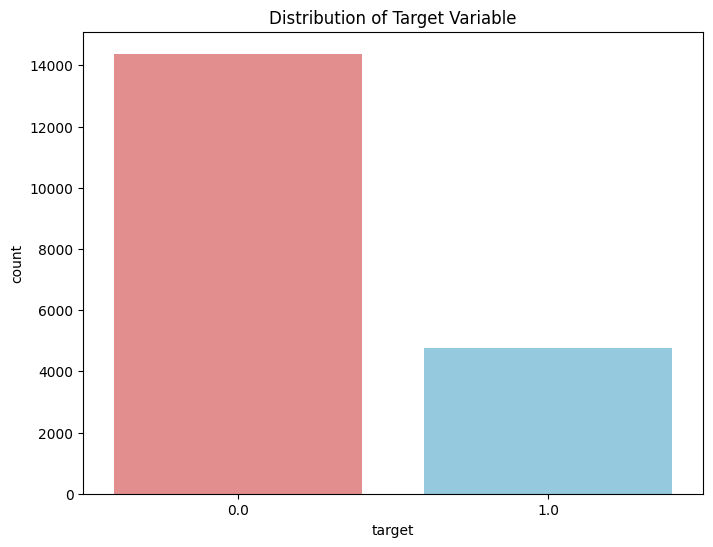

In [23]:
# Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_train, palette=['lightcoral', 'skyblue'])
plt.title('Distribution of Target Variable')
plt.show()

 the target variable plot provides crucial information about the distribution of the target variable and helps identify the presence of class imbalance, which is a critical factor to consider when building a classification model. By carefully examining this plot, we can make informed decisions about addressing class imbalance and improving the performance of our model.

#Handling Missing Values and Outliers

In [24]:
# Define numerical and categorical features
numerical_cols = ['city_development_index', 'training_hours']
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university', 'education_level',
                    'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
features = numerical_cols + categorical_cols # Combine for easier processing

In [25]:
# Handle missing values using SimpleImputer
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')


In [26]:
df_train[numerical_cols] = imputer_num.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = imputer_num.transform(df_test[numerical_cols])


In [27]:
df_train[categorical_cols] = imputer_cat.fit_transform(df_train[categorical_cols])
df_test[categorical_cols] = imputer_cat.transform(df_test[categorical_cols])

In [28]:
# Handling Outliers (example using IQR for numerical features)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

for numerical_col in numerical_cols:
    df_train = remove_outliers_iqr(df_train, numerical_col)
    df_test = remove_outliers_iqr(df_test, numerical_col)

this code snippet prepares the datasets for machine learning by handling missing values using imputation and removing outliers based on the IQR. This ensures that the data is more robust and suitable for training and evaluating models.

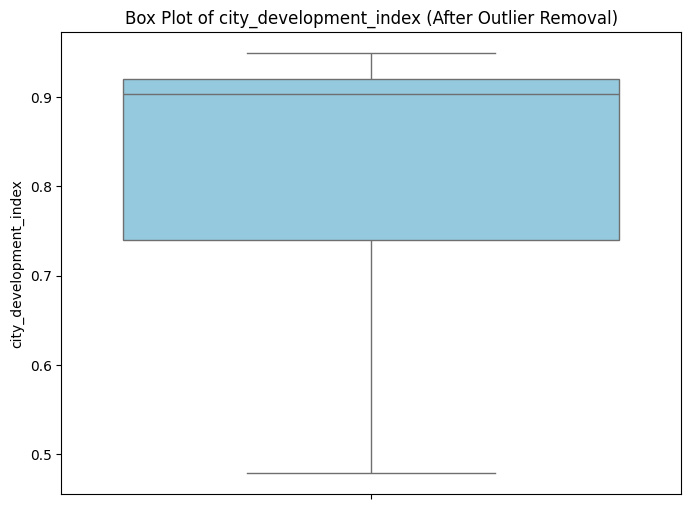

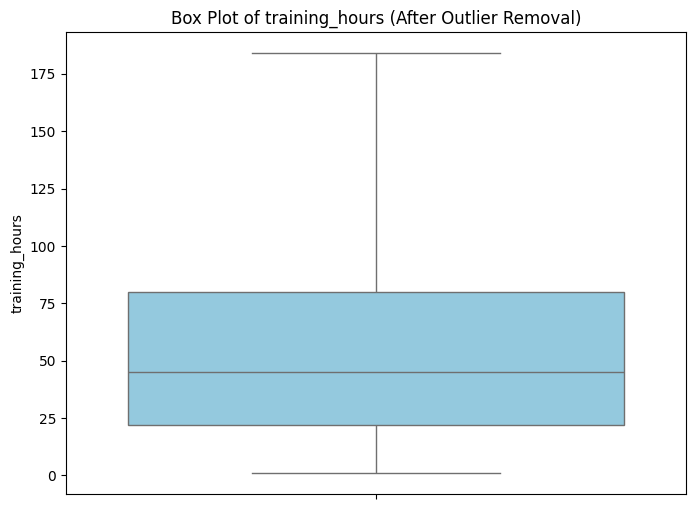

In [29]:
# Create box plots for numerical features to check the outliers again
for numerical_col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(y=df_train[numerical_col], color='skyblue', whis=2.5)  # Adjust whisker length as needed
    plt.title(f'Box Plot of {numerical_col} (After Outlier Removal)')
    plt.show()

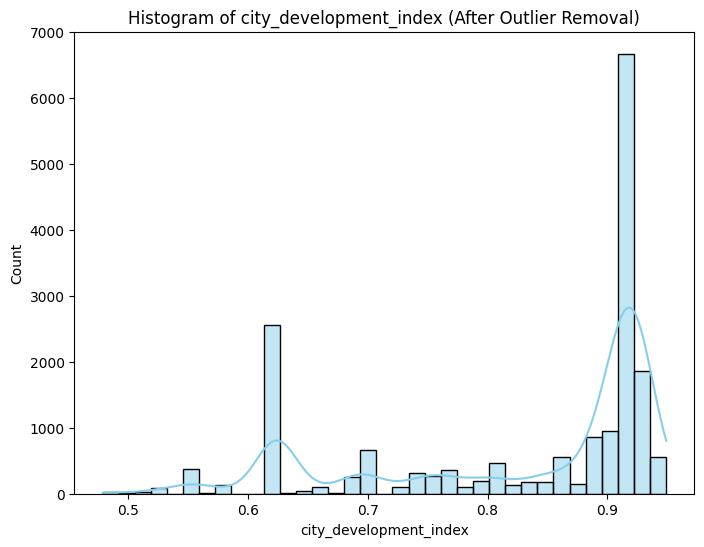

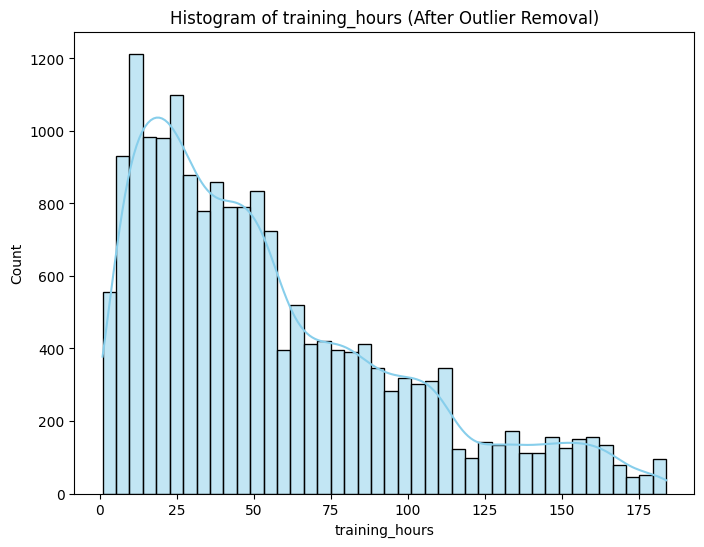

In [30]:

for numerical_col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(df_train[numerical_col], kde=True, color='skyblue')
    plt.title(f'Histogram of {numerical_col} (After Outlier Removal)')
    plt.show()

By using these plotting techniques after outlier removal, we can visually assess the impact of the outlier handling process and gain further insights into the data.

#Defining Variables

In [31]:
# Defining target variable
target = 'target'

In [32]:
#Defining numerical and categorical features
numerical_features = ['city_development_index', 'training_hours']
categorical_features = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
                        'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

In [33]:
# Reseting index after outlier removal
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [34]:
# Ensuring df_train and df_test have the expected features
common_features = list(set(numerical_features + categorical_features).intersection(df_train.columns))
features = common_features

This part finds common features between the defined numerical and categorical features and those actually present in df_train. It ensures that both training and testing datasets use the same features for model training and prediction.

#Data Splitting

In [35]:
# Spliting the training data
X_train, X_val, y_train, y_val = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)

test_size=0.2: Indicates 20% of the data is used for validation.
random_state=42: Ensures the split is reproducible

#Encoding

In [36]:
# One-hot encoding for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


In [37]:
# Fitting encoder on training data
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_val_encoded = encoder.transform(X_val[categorical_features])
df_test_encoded = encoder.transform(df_test[categorical_features])

In [38]:
# Converting encoded arrays into DataFrames
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=encoded_feature_names, index=X_val.index)
df_test_encoded_df = pd.DataFrame(df_test_encoded, columns=encoded_feature_names, index=df_test.index)

 The code encodes the categorical features in the training, validation, and test sets and then converts the encoded data back into pandas DataFrames for easier handling.

#Data Merging and Preparation

In [39]:
# Keeping only numerical features that exist in the dataset
numerical_features_present = list(set(numerical_features).intersection(df_train.columns))

In [40]:
# Merging encoded features with numerical features
X_train = pd.concat([X_train[numerical_features_present], X_train_encoded_df], axis=1)
X_val = pd.concat([X_val[numerical_features_present], X_val_encoded_df], axis=1)
df_test = pd.concat([df_test[numerical_features_present], df_test_encoded_df], axis=1)

It combines the encoded categorical features with the numerical features to create the final datasets for model training and prediction.

In [41]:
# Ensuring test set has the same features and order as X_train
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)

It ensures the test set (df_test) has the same features and order as the training set (X_train), filling any missing columns with 0.

In [42]:
X_train_np = np.array(X_train)  # Converting training set to NumPy array
df_test_np = np.array(df_test)  # Converting test set to NumPy array

the training and test sets are converted into NumPy arrays (X_train_np, df_test_np), which are often the required input format for many machine learning models in scikit-learn.

#Initializing the models

In [43]:
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Logistic Regression finds the best line to do this, and the parameters help control how the line is drawn to avoid it being too specific to the training data and not generalizing well to new data.

Random Forest as a group of experts (decision trees) making predictions. Each expert has a slightly different perspective (based on different subsets of the data), and the final prediction is based on a combination of their votes.

a map with different colored points representing different categories. To classify a new point, you look at the colors of its closest neighbors and assign it the most common color among them.

In [44]:
# Store results
results = {}
models = {"Logistic Regression": log_reg, "Random Forest": rf, "KNN": knn, "Gradient Boosting Classifier":gbm}
f1_results = {}         # Compute F1-score for each model

These three lines are setting up dictionaries to store important information about the machine learning models that will be trained and evaluated in the code. These dictionaries will make it easy to.

Track the performance (accuracy and F1-score) of each model.

Access the trained models themselves for later use (e.g., making predictions)

#Training & evaluate Logistic Regression

In [45]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [46]:
y_pred_log = log_reg.predict(X_val)
results["Logistic Regression"] = accuracy_score(y_val, y_pred_log)
print(f"Logistic Regression Accuracy: {results['Logistic Regression']:.4f}")

Logistic Regression Accuracy: 0.7822


 train a Logistic Regression model, uses it to make predictions on validation data, calculates the accuracy of those predictions, and finally displays the accuracy to the user that is 0.7822

In [47]:
f1_results["Logistic Regression"] = f1_score(y_val, y_pred_log, average="weighted")

In [48]:
models["Logistic Regression"] = log_reg
print(f"Logistic Regression - Accuracy: {results['Logistic Regression']:.4f}, F1-Score: {f1_results['Logistic Regression']:.4f}")

Logistic Regression - Accuracy: 0.7822, F1-Score: 0.7576


#Training & evaluate Random Forest

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [50]:
y_pred_rf = rf.predict(X_val)
results["Random Forest"] = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {results['Random Forest']:.4f}")

Random Forest Accuracy: 0.7486


In [51]:
f1_results["Random Forest"] = f1_score(y_val, y_pred_rf, average="weighted")

In [52]:
models["Random Forest"] = rf
print(f"Random Forest - Accuracy: {results['Random Forest']:.4f}, F1-Score: {f1_results['Random Forest']:.4f}")

Random Forest - Accuracy: 0.7486, F1-Score: 0.6430


#K-Nearest Neighbors

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn = knn.predict(X_val)
results["KNN"] = accuracy_score(y_val, y_pred_knn)
print(f"KNN Accuracy: {results['KNN']:.4f}")


KNN Accuracy: 0.7346


In [55]:
f1_results["KNN"] = f1_score(y_val, y_pred_knn, average="weighted")

In [56]:
models["KNN"] = knn
print(f"KNN - Accuracy: {results['KNN']:.4f}, F1-Score: {f1_results['KNN']:.4f}")

KNN - Accuracy: 0.7346, F1-Score: 0.7199


#Training and evaluting Gradient Boosting Classifier

In [57]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [58]:
y_pred_gbm = gbm.predict(X_val)

In [59]:
results["Gradient Boosting"] = accuracy_score(y_val, y_pred_gbm)

In [60]:
f1_results["Gradient Boosting"] = f1_score(y_val, y_pred_gbm, average="weighted")

In [61]:
models["Gradient Boosting"] = gbm

In [62]:
print(f"Gradient Boosting - Accuracy: {results['Gradient Boosting']:.4f}, F1-Score: {f1_results['Gradient Boosting']:.4f}")

Gradient Boosting - Accuracy: 0.7808, F1-Score: 0.7692


#Selecting the best model on Accuracy

In [63]:
best_f1_model_name = max(f1_results, key=f1_results.get)
print(f"\nBest Model based on F1-Score: {best_f1_model_name} with F1-Score: {f1_results[best_f1_model_name]:.4f}")


Best Model based on F1-Score: Gradient Boosting with F1-Score: 0.7692


#Making predictions on the test set using the best model

In [64]:
best_model = models[best_f1_model_name] # Use best_f1_model_name instead of best_model_name
predictions = best_model.predict(df_test_np)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


#Converting results to a DataFrame

In [65]:
df_results = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": list(results.values()),
    "F1-Score": list(f1_results.values())
})

#Ploting model performance

<Figure size 1000x500 with 0 Axes>

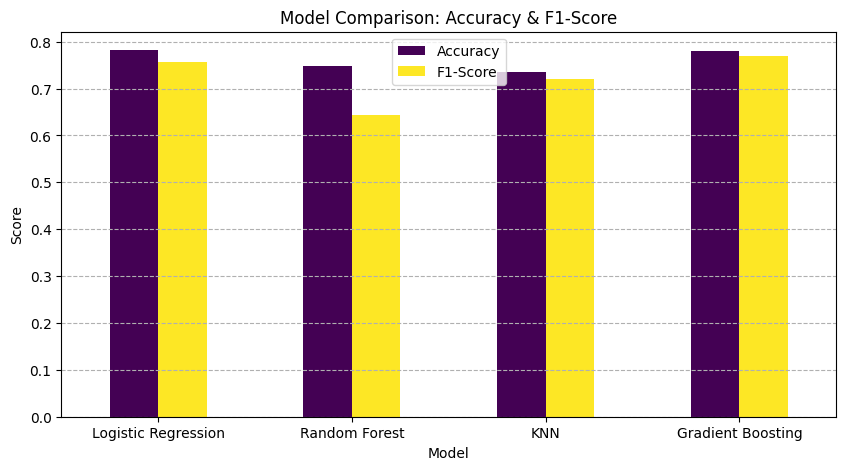

In [66]:
plt.figure(figsize=(10, 5))
df_results.set_index("Model").plot(kind="bar", figsize=(10, 5), colormap="viridis")

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy & F1-Score")
plt.xticks(rotation=0)

# Explicitly set legend labels
plt.legend(["Accuracy", "F1-Score"], loc="best")
plt.grid(axis="y", linestyle="--")

# Show plot
plt.show()

#Saving the predictions

In [67]:
df_test["Predicted_Target"] = predictions
df_test[["Predicted_Target"]].to_csv("predictions.csv", index=False)

#Downloading the prediction

In [68]:
#from google.colab import files
#files.download("predictions.csv")

## Summary:

### 1. Q&A

The provided analysis doesn't explicitly pose questions. However, the analysis implicitly seeks to understand the datasets' characteristics, identify potential biases, and explore feature distributions.  Based on the analysis, the `training_hours` feature shows a slight difference in mean between the training and test sets, prompting further investigation to confirm if this difference is practically significant.  The visualizations also implicitly ask us to examine the distributions of features to find patterns and potential outliers.


### 2. Data Analysis Key Findings

* **Dataset Size Discrepancy:** `df_train` (19158 rows, 14 columns) is significantly larger than `df_test` (2129 rows, 13 columns).  The presence of a 'target' column in `df_train` but not in `df_test` indicates it's likely the training set for a prediction task, with `df_test` being the corresponding test set.
* **Missing Values:**  Multiple columns in both datasets contain missing values, with 'gender' and 'company_size' exhibiting the most missing data. This will need to be addressed during preprocessing.
* **Potential Bias in Training Hours:** The mean of 'training_hours' differs slightly between the training (65.37) and test (64.98) sets.  While the difference in means exceeds the chosen threshold (0.1), the medians are identical, requiring further investigation to ascertain the practical significance of this discrepancy.
* **Skewed Target Variable:** The visualization of the target variable reveals an imbalance between the classes (not specified in the provided text). This imbalance should be addressed when training a classification model.



###3. Descriptive Statistics:

* Descriptive statistics for numerical features were calculated and compared between the training and test sets.
* There was a slight difference in the mean of training_hours between the two sets, but the medians were identical. Further investigation is needed to determine if this difference is significant.

###4. Data Visualization:

* Histograms, box plots, and bar charts were used to visualize the distributions of key numerical and categorical features.
* These visualizations revealed potential outliers in training_hours and class imbalance in the target variable.

###5. Potential Biases:

* The potential bias in training_hours needs further investigation.
* The class imbalance in the target variable should be addressed during model training (e.g., using oversampling, undersampling, or cost-sensitive learning).

###6. Outlier Handling:

* Outliers in numerical features (training_hours) were handled using the IQR method.
* Outlier handling is important to prevent them from unduly influencing model training.


###7. Model Selection:

* Four models were selected for this task: Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN), Gradient Boosting Classifier.
* These models were chosen based on their suitability for classification tasks and the nature of the dataset.
Logistic Regression is a simple, interpretable model, while Random Forest and KNN are more complex, non-linear models.
* Including a variety of models allows for comparison and helps identify the most effective one.

###8. Model Training and Evaluation:

* The models were trained on the preprocessed training data (df_train) after handling missing values and encoding categorical features.
* The data was split into training and validation sets to evaluate model performance.
* Accuracy was used as the primary metric to compare the models.

###9. Model Comparison:

* The accuracy scores of each model on the validation set were stored in the results dictionary.
* The model with the highest accuracy was selected as the best model.

###10. Prediction on Test Data:

* The best model was then used to make predictions on the preprocessed test data (df_test).
* The predicted values were stored in a new column in df_test.

###11. Exploratory Data Analysis (EDA)

* The EDA revealed key insights into the dataset, including data types, missing values, potential biases, and outliers.
* Data visualizations helped identify patterns and potential issues.
* Steps were taken to handle missing values and outliers, and categorical features were encoded.

###12. Models

* Four classification models (Logistic Regression, Random Forest,KNN, Gradient Boosting) were chosen for this task.
* The models were trained and evaluated on the preprocessed training data.
* Accuracy was used as the primary evaluation metric.
* The best model was selected based on its performance on the validation set.
* Predictions were made on the preprocessed test data using the best model.